### Sistema lineal de 1gdl con amortiguamiento excitado armónicamente

El siguiente código le permite analizar el efecto de distintos parámetros:

* Observe el efecto de las condiciones iniciales cambiando los valores de x0 y x0p.
* Observe el efecto de los parámetros del sistema cambiando $m$, $c$ y $k$.
* Observe como cambia la amplitud en régimen permanente variando la frecuencia de la fuerza de excitación, parámetro w.



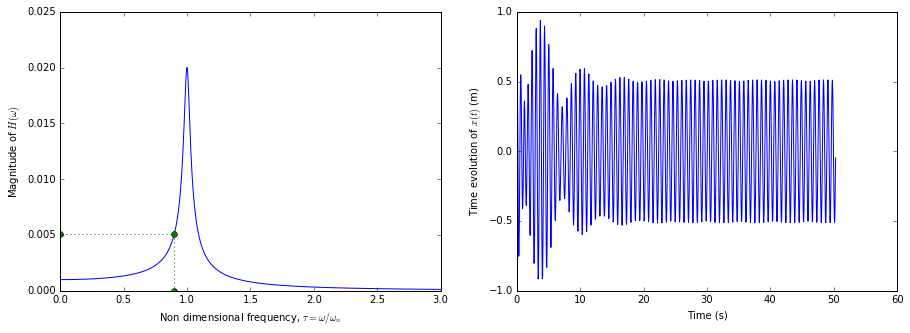

In [48]:
import numpy as np
from matplotlib import pyplot as plt
% matplotlib inline

x0 = 1.0
x0p = 1.0

m = 10.0
c = 5.0
k = 1000.0

wn = np.sqrt(k/m)
xi = c/(2*m*wn)
wd = wn*np.sqrt(1-xi**2)

F0 = 100.0
w = 9.0 # rad/s
tau = w/wn

NP = 1000
t = np.linspace(0,3,NP,endpoint = True)
Hw = (1./k)/np.sqrt((1-t**2)**2 + (2*xi*t)**2)
NC = 80 # number of cicles to show
tf = NC*2*np.pi/wd
time = np.linspace(0,tf,NP,endpoint = True)

plt.rcParams['figure.figsize'] = 15, 5

plt.subplot(1,2,1)
plt.plot(t,Hw)
Hw1 = (1./k)/np.sqrt((1-tau**2)**2 + (2*xi*tau)**2)
plt.plot([tau,tau,0],[0,Hw1,Hw1],':o')
plt.ylabel(r'Magnitude of $H(\omega)$')
plt.xlabel(r'Non dimensional frequency, $\tau=\omega/\omega_n$')

plt.subplot(1,2,2)
if tau==1:
    alfa = np.pi/2
else:
    alfa = np.arctan(2*xi*tau/(1-tau**2))
xP0 = Hw1*F0*np.sin(w*0-alfa)
xP0p = Hw1*F0*w*np.cos(w*0-alfa)
x = np.exp(-xi*wn*time)*(x0*np.cos(wd*time)+(x0p+xi*wn*x0)*np.sin(wd*time)/wd) - np.exp(-xi*wn*time)*(xP0*np.cos(wd*time)+(xP0p+xi*wn*xP0)*np.sin(wd*time)/wd) + Hw1*F0*np.sin(w*time-alfa)

plt.plot(time,x)
plt.ylabel(r'Time evolution of $x(t)$ (m)')
plt.xlabel(r'Time (s)')